In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Need additional librairies : 
* geopandas : https://geopandas.org/install.html
* descartes : https://docs.descarteslabs.com/installation.html

The following was heavily inspired from this tutorial : https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

Additional data for the map creation : https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

In [35]:
map_wards = gpd.read_file("data/London-wards-2018_ESRI")
geo = pd.read_csv("data/london_pcd2geo_2015.csv")
map_bouroughs = gpd.read_file('data/statistical-gis-boundaries-london/ESRI')
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_bouroughs.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot:>

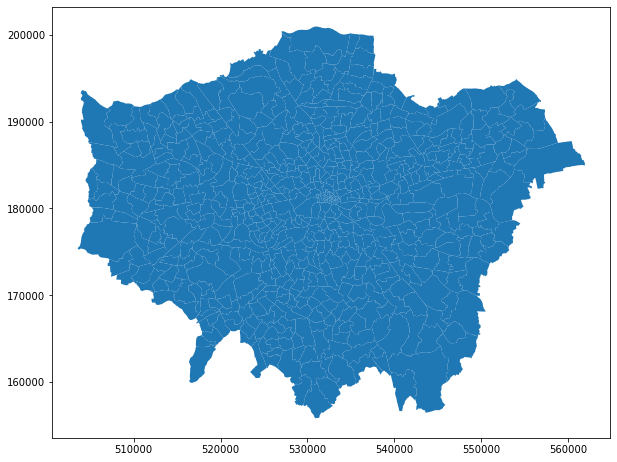

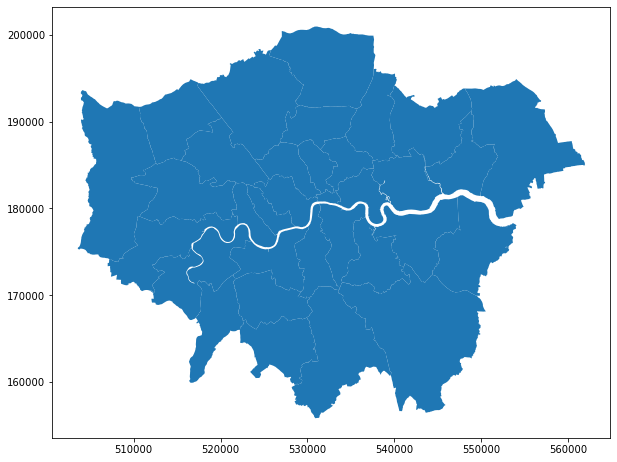

In [48]:
map_wards.plot(figsize=(10,10))
map_bouroughs.plot(figsize=(10,10))

In [49]:
# let's import the data:

final = pd.read_csv('ALDI_re_scale.csv')
final

,area_id,Names,Housing,Safety,Income,Life_Satisfaction,Civic,Work_Life_Balance,Jobs,Community,Education,Environment,Health,Alcohol,Foods,final
0,E05000029,Chadwell Heath,0.272774,0.706516,0.188386,0.020045,0.488171,0.824562,0.408683,0.598823,0.060768,0.439407,0.240289,0.706268,0.463695,0.356078
1,E05000042,Whalebone,0.197092,0.732037,0.309643,0.554566,0.594584,0.514172,0.592575,0.549269,0.309108,0.124352,0.587644,0.604055,0.390079,0.424147
2,E05000030,Eastbrook,0.271047,0.780257,0.317826,0.732739,0.548979,0.131582,0.448972,0.734458,0.233637,0.610582,0.248683,0.774124,0.461634,0.513341
3,E05000034,Heath,0.209849,0.632282,0.092421,0.376392,0.393159,0.949066,0.292956,0.658680,0.208357,0.268220,0.124195,0.768661,0.170894,0.367036
4,E05000040,Valence,0.167492,0.784703,0.161605,0.376392,0.336152,0.824562,0.494772,0.619126,0.105711,0.196704,0.044115,0.865401,0.341689,0.370629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,E05000295,Kenton West,0.349009,0.942557,0.355021,0.465479,0.666793,0.309213,0.780529,0.343648,0.521897,0.369531,0.652645,0.400192,0.366970,0.476174
628,E05011241,Cranbrook,0.317076,0.623172,0.350930,0.732739,0.556580,0.703948,0.605220,0.379173,0.763540,0.478282,0.439342,0.535222,0.415321,0.567279
629,E05011239,Clayhall,0.331043,0.699257,0.468468,0.732739,0.758005,0.473686,0.740913,0.450952,0.369067,0.371304,0.632051,0.592648,0.323559,0.517247
630,E05000222,Greenwich West,0.336561,0.466009,0.498968,0.821826,0.548979,0.595143,0.533658,0.452735,0.314505,0.666925,0.568173,0.756704,0.351386,0.511288


In [50]:
# Let's merge the two datasets
merged_wards = map_wards.set_index('GSS_CODE').join(final.set_index('area_id'))
merged_wards.head(3)

,NAME,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,Names,Housing,Safety,Income,...,Civic,Work_Life_Balance,Jobs,Community,Education,Environment,Health,Alcohol,Foods,final
GSS_CODE,,,,,,,,,,,,,,,,,,,,,
E05000405,Chessington South,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16...",Chessington South,0.353744,0.896662,0.351674,...,0.742803,0.514172,0.898729,0.844864,0.513168,0.881190,0.732725,0.000000,0.552522,0.613472
E05000414,Tolworth and Hook Rise,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16...",Tolworth and Hook Rise,0.324817,0.844614,0.334192,...,0.761805,0.226009,0.890376,0.608398,0.385571,0.500943,0.711253,0.827189,0.631233,0.600148
E05000401,Berrylands,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16...",Berrylands,0.294115,0.953123,0.501200,...,0.864418,0.418285,0.839067,0.689171,0.671285,0.529332,0.552216,0.790270,0.618013,0.786900


<AxesSubplot:>

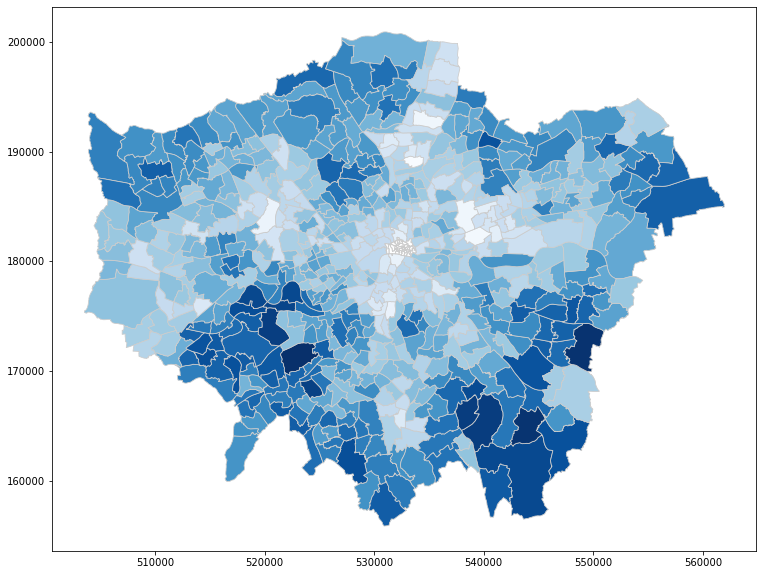

In [51]:
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_wards.plot(column='final', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


<AxesSubplot:>

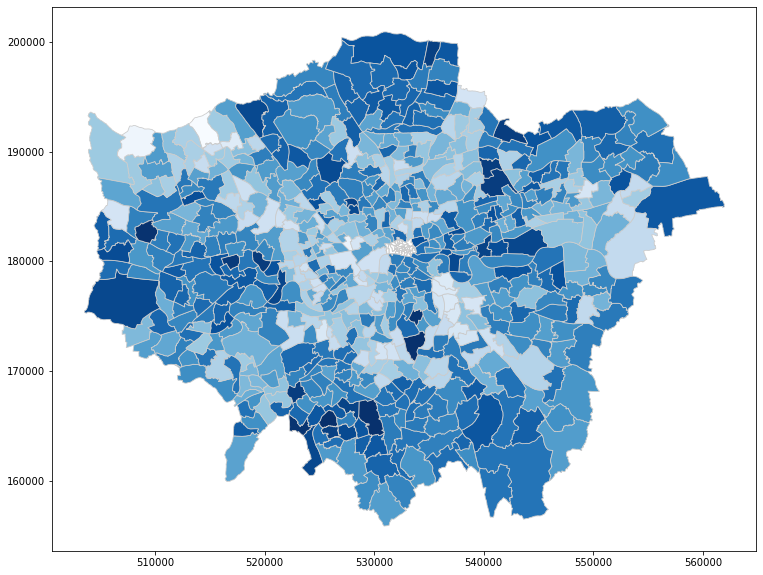

In [52]:
fig, ax = plt.subplots(1, figsize=(15, 10))
merged_wards.plot(column='Foods', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')


In [53]:
geo = geo[['oslaua','osward']].drop_duplicates() 
merged_bouroughs = map_bouroughs.merge(geo, right_on = 'oslaua',left_on = 'GSS_CODE')
merged_bouroughs = merged_bouroughs.merge(final,left_on = 'osward', right_on = 'area_id')

In [54]:
merged_bouroughs.head(3)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,oslaua,osward,...,Civic,Work_Life_Balance,Jobs,Community,Education,Environment,Health,Alcohol,Foods,final
0,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",E09000021,E05000408,...,0.537577,0.833796,0.717419,0.540244,0.294831,0.514575,0.732140,0.960982,0.451554,0.473794
1,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",E09000021,E05000402,...,0.799810,0.497609,0.736897,0.504500,0.773250,0.522264,0.525522,0.879239,0.408217,0.730446
2,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",E09000021,E05000403,...,0.799810,0.557896,0.846541,0.572597,0.684104,0.483954,0.813098,0.637987,0.466089,0.691810


0      Text(519297.6348074289, 166820.01149016235, 'K...
1      Text(519297.6348074289, 166820.01149016235, 'K...
2      Text(519297.6348074289, 166820.01149016235, 'K...
3      Text(519297.6348074289, 166820.01149016235, 'K...
4      Text(519297.6348074289, 166820.01149016235, 'K...
                             ...                        
627    Text(548040.1222768395, 185087.7901945672, 'Ba...
628    Text(548040.1222768395, 185087.7901945672, 'Ba...
629    Text(548040.1222768395, 185087.7901945672, 'Ba...
630    Text(548040.1222768395, 185087.7901945672, 'Ba...
631    Text(548040.1222768395, 185087.7901945672, 'Ba...
Length: 632, dtype: object

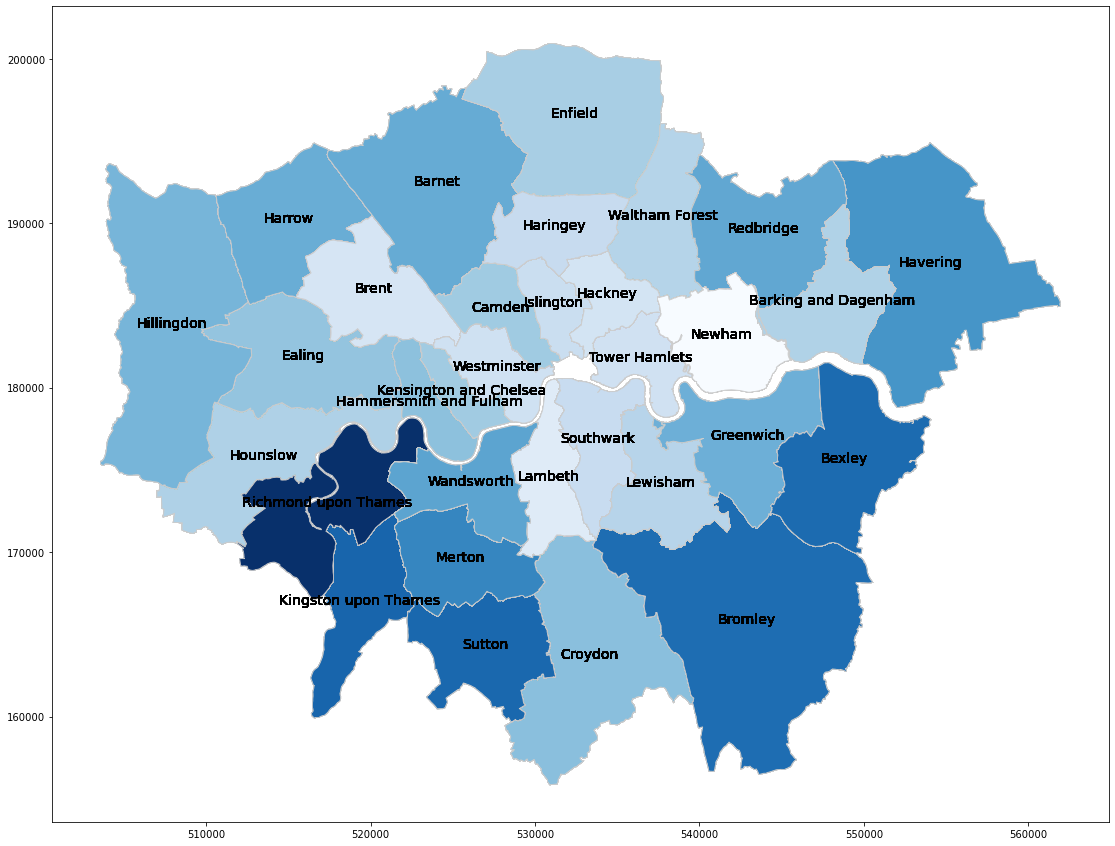

In [55]:
merged_bouroughs.final = merged_bouroughs.apply(lambda x : np.sum(merged_bouroughs[x.GSS_CODE == merged_bouroughs.GSS_CODE].final) 
                                               / np.sum([x.GSS_CODE == merged_bouroughs.GSS_CODE]), axis =1)


fig, ax = plt.subplots(1, figsize=(20, 15))
merged_bouroughs.plot(column='final', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
merged_bouroughs.apply(lambda x: ax.text(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1],s=x.NAME,ha='center', fontsize=14), axis = 1)


0      Text(519297.6348074289, 166820.01149016235, 'K...
1      Text(519297.6348074289, 166820.01149016235, 'K...
2      Text(519297.6348074289, 166820.01149016235, 'K...
3      Text(519297.6348074289, 166820.01149016235, 'K...
4      Text(519297.6348074289, 166820.01149016235, 'K...
                             ...                        
627    Text(548040.1222768395, 185087.7901945672, 'Ba...
628    Text(548040.1222768395, 185087.7901945672, 'Ba...
629    Text(548040.1222768395, 185087.7901945672, 'Ba...
630    Text(548040.1222768395, 185087.7901945672, 'Ba...
631    Text(548040.1222768395, 185087.7901945672, 'Ba...
Length: 632, dtype: object

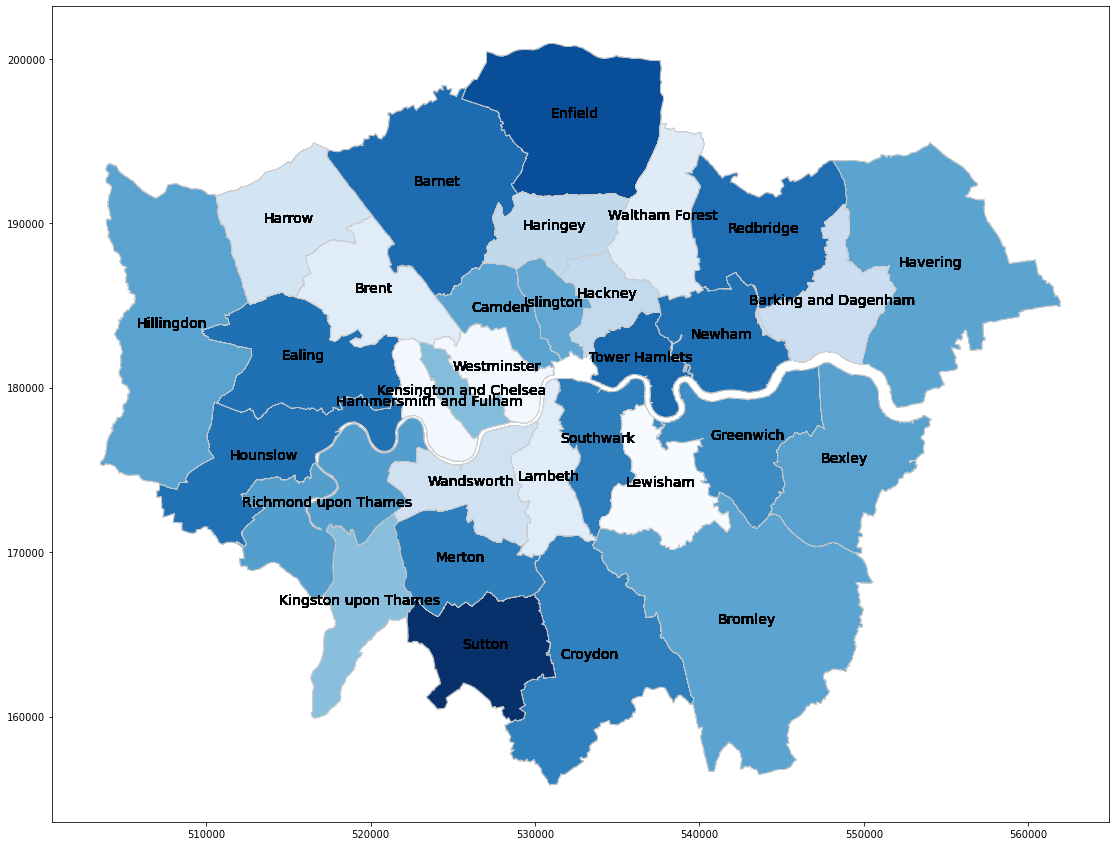

In [56]:
merged_bouroughs.Foods = merged_bouroughs.apply(lambda x : np.sum(merged_bouroughs[x.GSS_CODE == merged_bouroughs.GSS_CODE].Foods) 
                                               / np.sum([x.GSS_CODE == merged_bouroughs.GSS_CODE]), axis =1)


fig, ax = plt.subplots(1, figsize=(20, 15))
merged_bouroughs.plot(column='Foods', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
merged_bouroughs.apply(lambda x: ax.text(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1],s=x.NAME,ha='center', fontsize=14), axis = 1)




0      Text(519297.6348074289, 166820.01149016235, 'K...
1      Text(519297.6348074289, 166820.01149016235, 'K...
2      Text(519297.6348074289, 166820.01149016235, 'K...
3      Text(519297.6348074289, 166820.01149016235, 'K...
4      Text(519297.6348074289, 166820.01149016235, 'K...
                             ...                        
627    Text(548040.1222768395, 185087.7901945672, 'Ba...
628    Text(548040.1222768395, 185087.7901945672, 'Ba...
629    Text(548040.1222768395, 185087.7901945672, 'Ba...
630    Text(548040.1222768395, 185087.7901945672, 'Ba...
631    Text(548040.1222768395, 185087.7901945672, 'Ba...
Length: 632, dtype: object

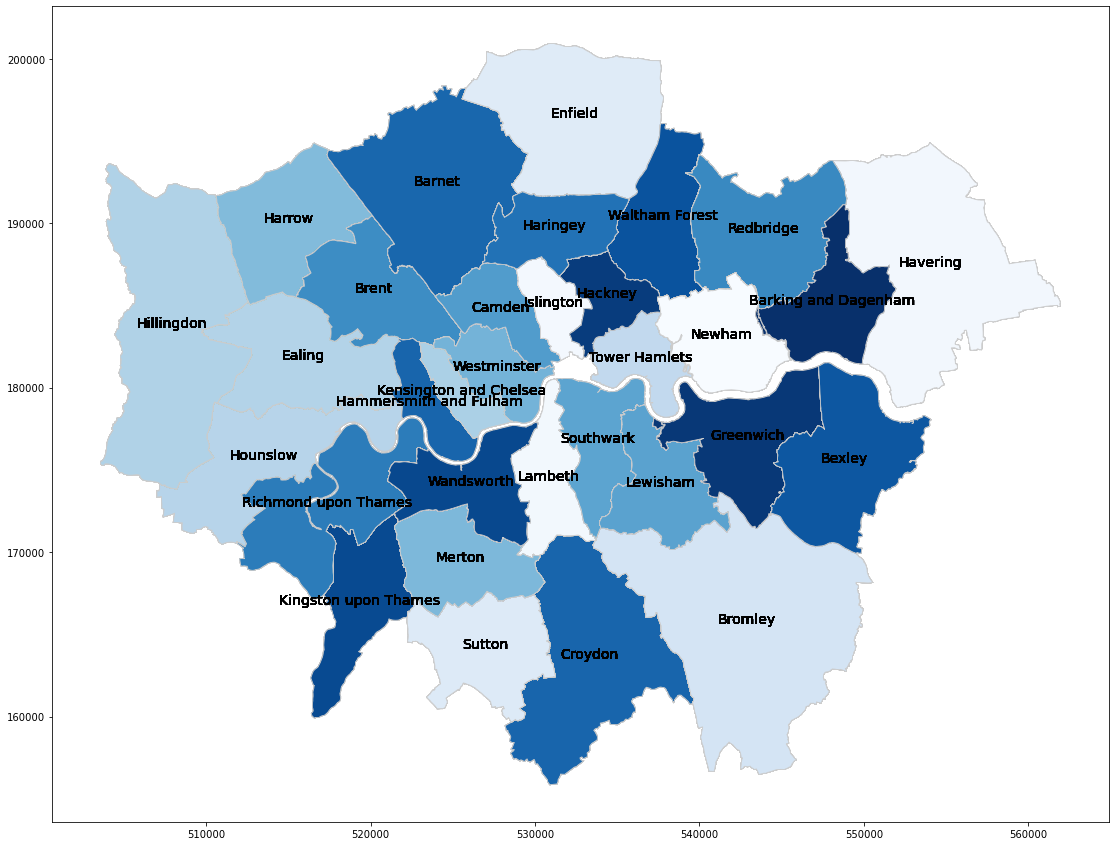

In [57]:
cat = 'Alcohol'
merged_bouroughs.loc[:,cat] = merged_bouroughs.apply(lambda x : np.sum(merged_bouroughs[x.GSS_CODE == merged_bouroughs.GSS_CODE].loc[:,cat]) 
                                               / np.sum([x.GSS_CODE == merged_bouroughs.GSS_CODE]), axis =1)


fig, ax = plt.subplots(1, figsize=(20, 15))
merged_bouroughs.plot(column=cat, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
merged_bouroughs.apply(lambda x: ax.text(x.geometry.centroid.coords[0][0], x.geometry.centroid.coords[0][1],s=x.NAME,ha='center', fontsize=14), axis = 1)


<AxesSubplot:>

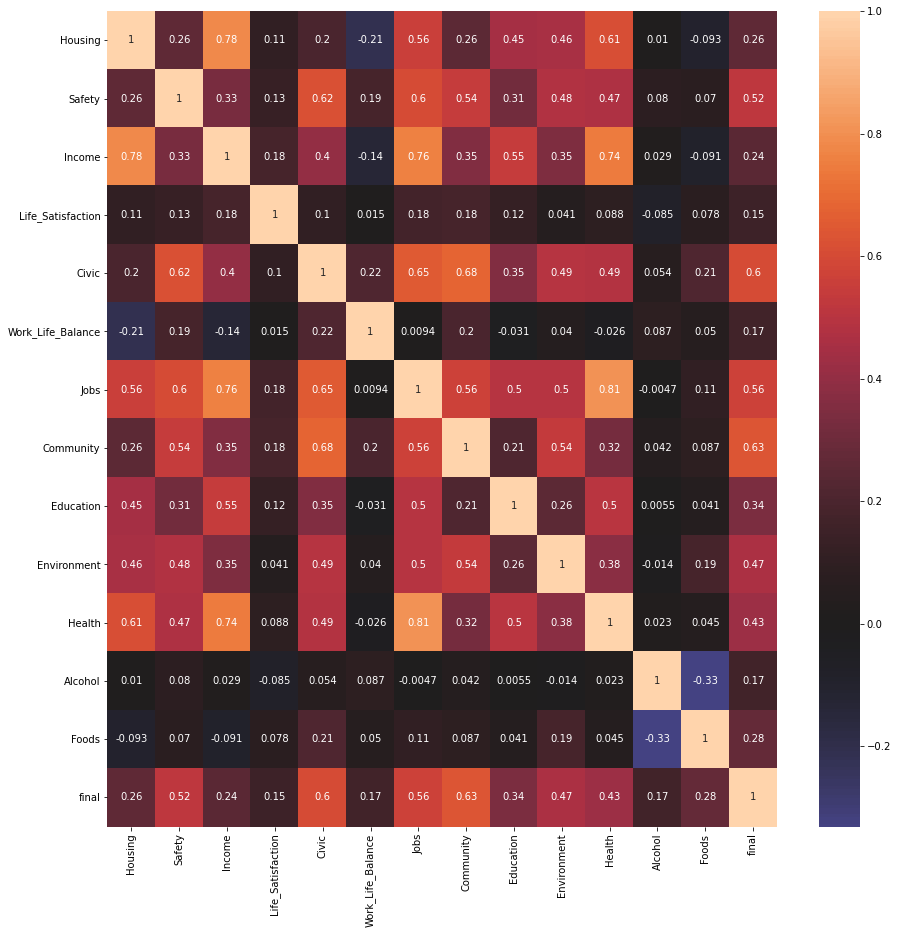

In [58]:
correlations  = (merged_bouroughs.loc[:,['Housing', 'Safety', 'Income', 'Life_Satisfaction',
       'Civic', 'Work_Life_Balance', 'Jobs', 'Community', 'Education',
       'Environment', 'Health', 'Alcohol', 'Foods', 'final']]).corr()
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(correlations, annot=True, ax=ax, center = 0)


In [47]:
merged_bouroughs.geometry.iloc[0].centroid.coords[0][0]

519297.6348074289

![alt text](data\super_accurate_validation_data.jpg "Title")